Quality :  16624790.773366667 , Iteration :  0
Quality :  16624790.850433333 , Iteration :  1
Quality :  16624790.853155555 , Iteration :  2
Quality :  16624790.879722223 , Iteration :  3
Quality :  16624790.883155556 , Iteration :  4
Quality :  16624790.888811111 , Iteration :  5
Quality :  16624790.8891 , Iteration :  6
Quality :  16624790.89461111 , Iteration :  7
Quality :  16624790.897622222 , Iteration :  8
Quality :  16624790.897622222 , Iteration :  9
Quality :  16624790.899177779 , Iteration :  10
Quality :  16624790.908655556 , Iteration :  11
Quality :  16624790.909533333 , Iteration :  12
Quality :  16624790.91 , Iteration :  13
Quality :  16624790.920766667 , Iteration :  14
Quality :  16624790.921177778 , Iteration :  15
Quality :  16624790.921733333 , Iteration :  16
Quality :  16624790.935622223 , Iteration :  17
Quality :  16624790.93651111 , Iteration :  18
Quality :  16624790.94048889 , Iteration :  19
Quality :  16624790.94048889 , Iteration :  20
Quality :  1662479

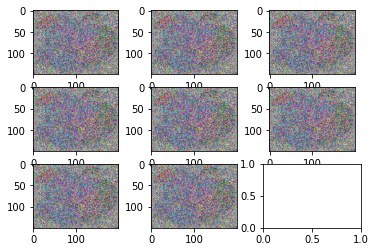

In [12]:
import os
import sys
import numpy
#import scipy.misc
import itertools
import GARI2
import cv2

"""
Reproduce a single image using Genetic Algorithm (GA) by evolving 
single pixel values.

This project works with both color and gray images without any modifications. 
Just give the image path.
Using three parameters, we can customize it to statisfy our need. 
The parameters are:
    1) Population size. I.e. number of individuals pepr population.
    2) Mating pool size. I.e. Number of selected parents in the mating pool.
    3) Mutation percentage. I.e. number of genes to change their values.

Value encoding used for representing the input.
Crossover is applied by exchanging half of genes from two parents.
Mutation is applied by randomly changing the values of randomly selected 
predefined percent of genes from the parents chromosome.

This project is implemented using Python 3.5 by Ahmed F. Gad.
Contact info:
ahmed.fawzy@ci.menofia.edu.eg
https://www.linkedin.com/in/ahmedfgad/
"""

# Reading target image to be reproduced using Genetic Algorithm (GA).
target_im = cv2.imread('fruit.jpg')
# Target image after enconding. Value encoding is used.
target_chromosome = GARI2.img2chromosome(target_im)

# Population size
sol_per_pop = 8
# Mating pool size
num_parents_mating = 4
# Mutation percentage
mutation_percent = .01

"""
There might be inconsistency between the number of selected mating parents and 
number of selected individuals within the population.
In some cases, the number of mating parents are not sufficient to 
reproduce a new generation. If that occurred, the program will stop.
"""
num_possible_permutations = len(list(itertools.permutations(iterable=numpy.arange(0, 
                                                            num_parents_mating), r=2)))
num_required_permutations = sol_per_pop-num_possible_permutations
if(num_required_permutations>num_possible_permutations):
    print(
    "\n*Inconsistency in the selected populatiton size or number of parents.*"
    "\nImpossible to meet these criteria.\n"
    )
    sys.exit(1)


# Creating an initial population randomly.
new_population = GARI2.initial_population(img_shape=target_im.shape, 
                                         n_individuals=sol_per_pop)

for iteration in range(10000):
    # Measing the fitness of each chromosome in the population.
    qualities = GARI2.cal_pop_fitness(target_chromosome, new_population)
    print('Quality : ', numpy.max(qualities), ', Iteration : ', iteration)
    
    # Selecting the best parents in the population for mating.
    parents = GARI2.select_mating_pool(new_population, qualities, 
                                      num_parents_mating)
    
    # Generating next generation using crossover.
    new_population = GARI2.crossover(parents, target_im.shape, 
                                    n_individuals=sol_per_pop)

    """
    Applying mutation for offspring.
    Mutation is important to avoid local maxima. Avoiding mutation makes 
    the GA falls into local maxima.
    Also mutation is important as it adds some little changes to the offspring. 
    If the previous parents have some common degaradation, mutation can fix it.
    Increasing mutation percentage will degarde next generations.
    """
    new_population = GARI2.mutation(population=new_population, 
                                   num_parents_mating=num_parents_mating, 
                                   mut_percent=mutation_percent)
    """
    Save best individual in the generation as an image for later visualization.
    """
    GARI2.save_images(iteration, qualities, new_population, target_im.shape, 
                     save_point=500, save_dir=os.curdir+'//')

# Display the final generation
GARI2.show_indivs(new_population, target_im.shape)
